In [1]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
import torch
matplotlib.rc('font',family='Times New Roman')

In [2]:
result_file = '../exp_results/2024_09_03_17_55_58.txt'
with open(result_file, 'r') as f:
    lines = f.readlines()

actual_thetas = []
predicted_thetas = []
throttles = []
for l in lines:
    if 'Actual' in l:
        actual = l.split(',')[1:]
        actual = [float(a) for a in actual]
        actual_thetas.append(actual)
    if 'Predicted' in l:
        predicted = l.split(',')[1:]
        predicted = [float(a) for a in predicted]
        predicted_thetas.append(predicted)
    if 'Throttle' in l:
        throttle = l.split(',')[1:]
        throttle = [float(a) for a in throttle]
        throttles.append(throttle)

actual_thetas = np.array(actual_thetas)
predicted_thetas = np.array(predicted_thetas)
throttles = np.array(throttles)

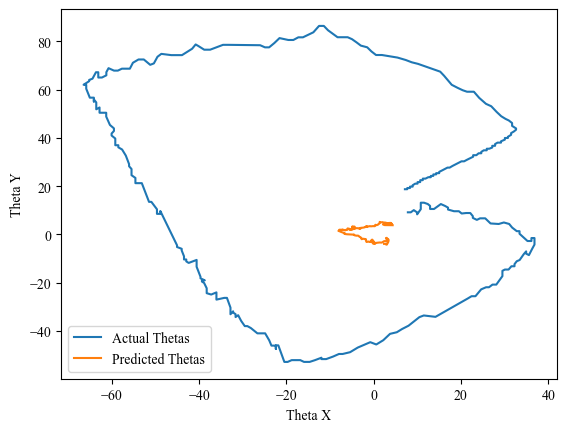

In [3]:
plt.plot(actual_thetas[:, 0], actual_thetas[:, 1], label='Actual Thetas')
plt.xlabel('Theta X')
plt.ylabel('Theta Y')
plt.plot(predicted_thetas[:, 1], predicted_thetas[:, 0], label='Predicted Thetas')
plt.legend()

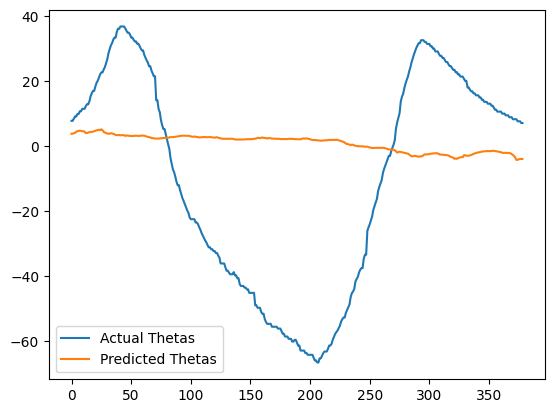

In [100]:
plt.plot(np.arange(len(actual_thetas)), actual_thetas[:, 0], label='Actual Thetas')
plt.plot(np.arange(len(predicted_thetas)), predicted_thetas[:, 0],  label='Predicted Thetas')
plt.legend()

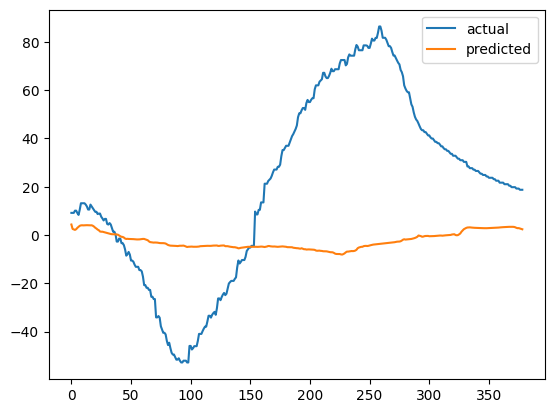

In [101]:

plt.plot(np.arange(len(actual_thetas)), actual_thetas[:, 1], label='actual')
plt.plot(np.arange(len(predicted_thetas)), predicted_thetas[:, 1], label='predicted')
plt.legend()

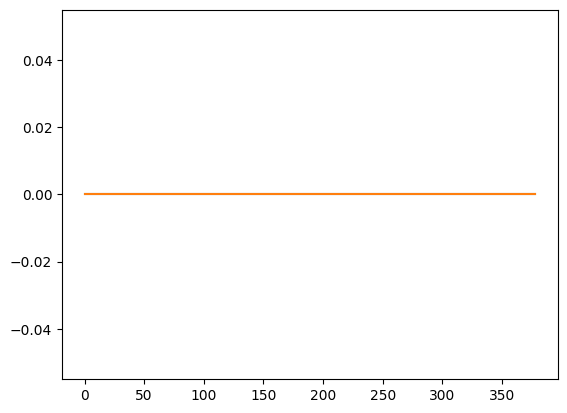

In [102]:
plt.plot(np.arange(len(throttles)), throttles[:, 0])
plt.plot(np.arange(len(throttles)), throttles[:, 1])

In [103]:
np.sqrt(np.mean((actual_thetas[:, 2:] - predicted_thetas[:, 2:])**2))

np.float64(477.24778909250927)

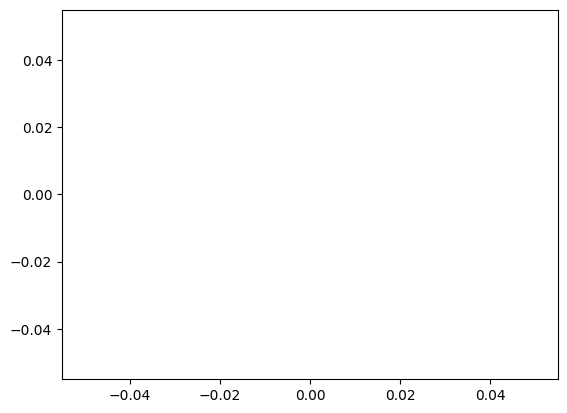

In [79]:
plt.plot(np.arange(len(predicted_thetas))[300:550], predicted_thetas[300:550, 2])
plt.plot(np.arange(len(actual_thetas))[300:550], actual_thetas[300:550, 2])

In [103]:
vel_from_pos = np.diff(predicted_thetas[:, :2], axis=0)
pred_state = np.concatenate([predicted_thetas[:-1, :2], vel_from_pos], axis=1)
np.sqrt(np.mean((actual_thetas[:-1, 2:] - pred_state[:, 2:])**2))

np.float64(273.7898414582535)

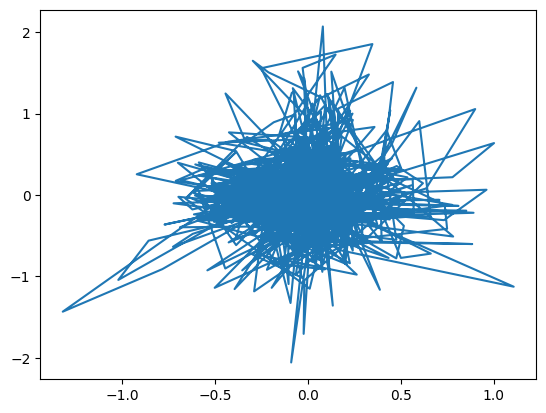

In [17]:
plt.plot(pred_state[:, 2], pred_state[:, 3], label='Predicted Thetas from Vel')

In [18]:
all_data_raw = np.concatenate([actual_thetas, predicted_thetas, throttles], axis=1)
all_data_from_vel = np.concatenate([actual_thetas[:-1], pred_state, throttles[:-1]], axis=1)
df_all_data_raw = pd.DataFrame(all_data_raw, columns=['Actual Theta X', 'Actual Theta Y', 'Actual Theta X Vel', 'Actual Theta Y Vel', 'Predicted Theta X', 'Predicted Theta Y', 'Predicted Theta X Vel', 'Predicted Theta Y Vel', 'Throttle X', 'Throttle Y'])
df_all_data_from_vel = pd.DataFrame(all_data_from_vel, columns=['Actual Theta X', 'Actual Theta Y', 'Actual Theta X Vel', 'Actual Theta Y Vel', 'Predicted Theta X', 'Predicted Theta Y', 'Predicted Theta X Vel', 'Predicted Theta Y Vel', 'Throttle X', 'Throttle Y'])


In [19]:
df_all_data_raw = df_all_data_raw[(np.abs(df_all_data_raw['Actual Theta X Vel']) < 150) & (np.abs(df_all_data_raw['Actual Theta Y Vel']) < 150) & (np.abs(df_all_data_raw['Predicted Theta X Vel']) < 150) & (np.abs(df_all_data_raw['Predicted Theta Y Vel']) < 150)].dropna()
df_all_data_from_vel = df_all_data_from_vel[(np.abs(df_all_data_from_vel['Actual Theta X Vel']) < 150) & (np.abs(df_all_data_from_vel['Actual Theta Y Vel']) < 150)].dropna()

In [76]:
actual = df_all_data_raw[df_all_data_raw.columns[:4]].values
predicted = df_all_data_raw[df_all_data_raw.columns[4:8]].values
RMSE = np.sqrt(np.mean((actual - predicted)**2))

In [77]:
RMSE

np.float64(6.757917628678529)

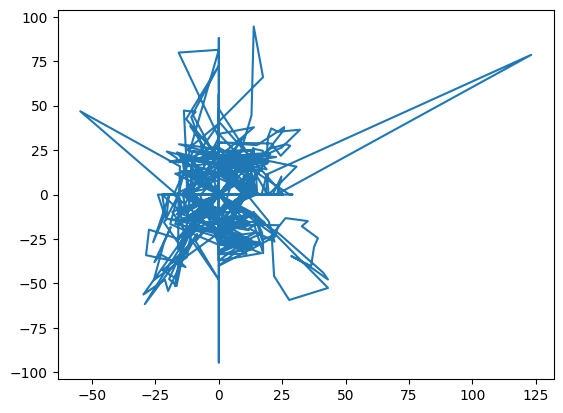

In [74]:
plt.plot(df_all_data_raw['Actual Theta X Vel'], df_all_data_raw['Actual Theta Y Vel'], label='Predicted Thetas from Vel')


In [6]:
# result_file = '../pos_rec/2024_09_03_21_59_14.txt'
result_file = '../pos_rec/2024_09_03_21_58_15_no_filter.txt'
with open(result_file, 'r') as f:
    lines = f.readlines()

actual_thetas = []
for l in lines:
    if 'Actual' in l:
        actual = l.split(',')[1:]
        actual = [float(a) for a in actual]
        actual_thetas.append(actual)

actual_thetas = np.array(actual_thetas)

In [9]:
result_file = '../pos_rec/2024_09_17_17_19_40R90limb_9.txt'
# result_file = '../pos_rec/2024_09_05_19_50_50R97.txt'
with open(result_file, 'r') as f:
    lines = f.readlines()

bounded_thetas = []
for l in lines:
    if 'Actual' in l:
        bounded = l.split(',')[1:]
        bounded = [float(a) for a in bounded]
        bounded_thetas.append(bounded)

bounded_thetas = np.array(bounded_thetas)

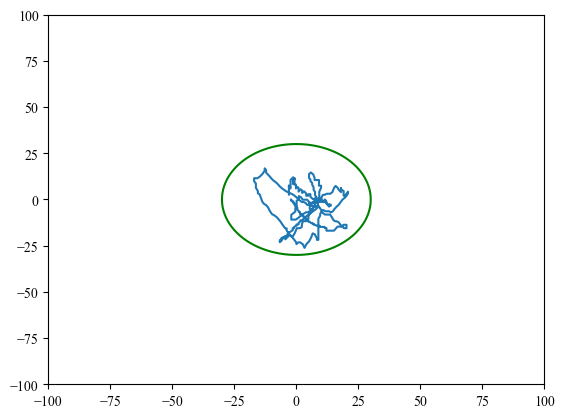

In [10]:
plt.xlim(-100, 100)
plt.ylim(-100, 100)
plt.plot(bounded_thetas[:, 0], bounded_thetas[:, 1], label='Filtered')
# plt.plot(actual_thetas[:, 0], actual_thetas[:, 1], label='No Filter')
plt.plot(30*np.sin(np.linspace(0, 2*np.pi, 100)), 30*np.cos(np.linspace(0, 2*np.pi, 100)), label='boundary', color='g')
# plt.legend()

In [11]:
from robo_limb_rl.arch.Q_net import QNet_MLP


In [12]:
theta_x = torch.linspace(-100, 100, 200)
theta_y = torch.linspace(-100, 100, 200)
theta_x_dot = torch.zeros(1)
theta_y_dot = torch.zeros(1)

grid = torch.meshgrid(theta_x, theta_y, theta_x_dot, theta_y_dot)
grid = torch.stack(grid, dim=-1)


In [13]:
model = QNet_MLP(input_dim=4, output_dim=4, reward_type='reg').to('cpu')
model.load_state_dict(torch.load('/home/ansue1234/Research/SML/RobLimbFK/ros_ws/src/model_runner/policies/online_s500000_reg_loss_simple_discrete.cleanrl_model', map_location='cpu', weights_only=True))
model.eval()

QNet_MLP(
  (network): Sequential(
    (0): Linear(in_features=4, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=2048, bias=True)
    (5): ReLU()
    (6): Linear(in_features=2048, out_features=1024, bias=True)
    (7): ReLU()
    (8): Linear(in_features=1024, out_features=512, bias=True)
    (9): ReLU()
    (10): Linear(in_features=512, out_features=4, bias=True)
  )
)

(array([-125., -100.,  -75.,  -50.,  -25.,    0.,   25.,   50.,   75.,
         100.,  125.]),
 [Text(0, -125.0, '−125'),
  Text(0, -100.0, '−100'),
  Text(0, -75.0, '−75'),
  Text(0, -50.0, '−50'),
  Text(0, -25.0, '−25'),
  Text(0, 0.0, '0'),
  Text(0, 25.0, '25'),
  Text(0, 50.0, '50'),
  Text(0, 75.0, '75'),
  Text(0, 100.0, '100'),
  Text(0, 125.0, '125')])

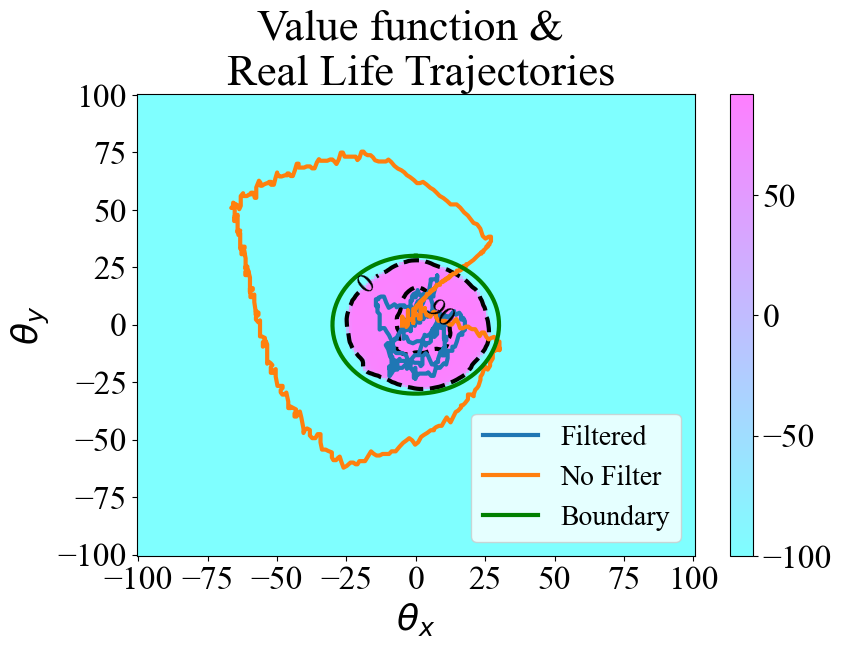

In [14]:
from matplotlib import font_manager
fig, ax = plt.subplots(figsize=(9, 6))

states = grid.view(-1, 4)
v_val = model(states).max(dim=-1)[0].detach().numpy().reshape(200, 200, 1, 1)
X = theta_x
Y = theta_y
Z = v_val[:, :, 0, 0]
# Transpose because contourf is weird
Z = Z.T
cmap = plt.get_cmap("cool")
image = ax.pcolormesh(X,Y,Z, cmap=cmap, vmin=Z.min(), vmax=Z.max(), alpha=0.5, edgecolors="none")
CS = ax.contour(X, Y, Z, levels=[0, 90], colors="k", linestyles=["dashed"], linewidths=[3], )
cbar = fig.colorbar(image, ax=ax)
# cbar.set_label(r"$\hat{V}^*$", fontsize=26)
cbar.ax.tick_params(labelsize=24)
ax.plot(bounded_thetas[:, 0], bounded_thetas[:, 1], label='Filtered', linewidth=3)
ax.plot(actual_thetas[:, 0], actual_thetas[:, 1], label='No Filter', linewidth=3)

ax.set_xlabel(r"$\theta_x$", fontsize=26, fontname="Times New Roman")
ax.set_ylabel(r"$\theta_y$", fontsize=26, fontname="Times New Roman")
font_props = font_manager.FontProperties(family='Times New Roman')
ax.clabel(CS, inline=1, fontsize=20)
ax.set_title("Value function & \n Real Life Trajectories", fontsize=32, fontname="Times New Roman")
ax.plot(30*np.sin(np.linspace(0, 2*np.pi, 100)), 30*np.cos(np.linspace(0, 2*np.pi, 100)), label='Boundary', linewidth=3, color='g')
plt.legend(fontsize=20)
plt.xticks(fontsize=24, fontname='Times New Roman')
plt.yticks(fontsize=24, fontname='Times New Roman')




In [15]:
# Compute Statistics
def to_numpy(path):
    result_file = path
    with open(result_file, 'r') as f:
        lines = f.readlines()

    bounded_thetas = []
    for l in lines:
        if 'Actual' in l:
            bounded = l.split(',')[1:]
            bounded = [float(a) for a in bounded]
            bounded_thetas.append(bounded)

    bounded_thetas = np.array(bounded_thetas)
    return bounded_thetas

In [16]:
files = ['2024_09_05_19_33_08R50.txt']
first_outside = []
for f in files:
    bounded_thetas = to_numpy('../pos_rec/processing/' + f)
    # print(bounded_thetas)
    print(np.argmax(np.linalg.norm(bounded_thetas[:,:2], axis=1) > 30))
    first_outside += [np.argmax(np.linalg.norm(bounded_thetas[:, :2], axis=1) > 30)]
avg_first_outside = np.mean(np.array(first_outside))
std_first_outside = np.std(np.array(first_outside))
avg_first_outside, std_first_outside

106


(np.float64(106.0), np.float64(0.0))

In [17]:
x_val = np.array([0, 50, 80, 85, 87])
y_val = np.array([71.66, 106, 224.66, 239.25, 290.75])*0.05
y_std = np.array([1.69, 0, 82.44, 28.82, 69.88])*0.05

In [18]:
# plot with error bars
# plt.plot(x, y)
# Your existing plot code
plt.errorbar(x, y, yerr=y_std, fmt='o-', capsize=5, ecolor=(1, 0, 0, 0.5), linewidth=3, markersize=10)

# Set axis labels with Times New Roman font and font size 28
plt.xlabel(r"Threshold Value ($\epsilon_2$)", fontsize=24, fontname='Times New Roman')
plt.ylabel('Time to Unsafe Region (s)', fontsize=24, fontname='Times New Roman')

# Set tick font size to 24
plt.xticks(fontsize=20, fontname='Times New Roman')
plt.yticks(fontsize=20, fontname='Times New Roman')
plt.title("Time to Unsafe Region \n vs. $\epsilon_2$", fontsize=28, fontname='Times New Roman')
# Display grid
plt.grid()

NameError: name 'x' is not defined

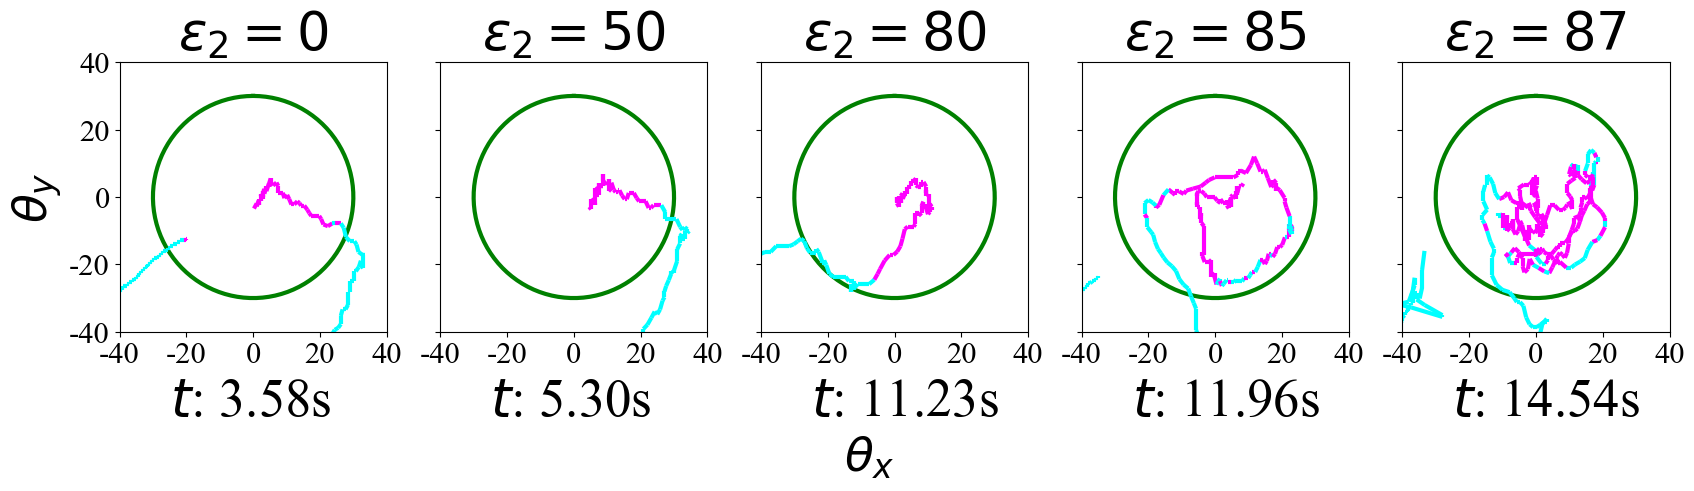

In [29]:
# from matplotlib.collections import LineCollection
# # ploting trajectory
# files = ['2024_09_05_20_09_26R0.txt',
#          '2024_09_05_19_33_08R50.txt',
#          '2024_09_05_19_36_53R90.txt',
#          '2024_09_05_19_44_59R95.txt',
#          '2024_09_05_19_50_50R97.txt']

# fig, axs = plt.subplots(1, 5, figsize=(20, 3.5), sharex=True, sharey=True)
# thresholds = [0, 50, 80, 85, 87]
# for i, ax in enumerate(axs):
#     bounded_thetas = to_numpy('../pos_rec/processing/' + files[i])
#     input_data = torch.tensor(bounded_thetas).float()
#     output = model(input_data).max(dim=-1)[0].detach().numpy()
#     x = bounded_thetas[:, 0]
#     y = bounded_thetas[:, 1]
#     points = np.array([x, y]).T.reshape(-1, 1, 2)
#     segments = np.concatenate([points[:-1], points[1:]], axis=1)

#     ax.set_title(f"$\epsilon_2=${thresholds[i]}", fontsize=32, fontname="Times New Roman")
#     ax.plot(30*np.sin(np.linspace(0, 2*np.pi, 100)), 30*np.cos(np.linspace(0, 2*np.pi, 100)), label='Boundary', linewidth=3, color='g')

#     # Create a LineCollection
#     color = np.zeros_like(output)
#     color[output > thresholds[i]] = 1
#     color[output <= thresholds[i]] = -1
    
#     lc = LineCollection(segments, cmap='cool', array=color, linewidth=3)
#     line = ax.add_collection(lc)

#     # Set plot limits
#     ax.set_xlim(-40, 40)
#     ax.set_ylim(-40, 40)

#     # Add colorbar
#     # plt.colorbar(line)

#     # Set labels and title
#     # ax.set_xlabel('X-axis')
#     # ax.set_ylabel('Y-axis')
#     # ax.set_title('Gradient Line with Cool Colormap')
# plt.show()
from matplotlib.collections import LineCollection
import numpy as np
import matplotlib.pyplot as plt

# Your existing code for file names and thresholds
files = ['2024_09_05_20_09_26R0.txt',
         '2024_09_05_19_33_08R50.txt',
         '2024_09_05_19_36_53R90.txt',
         '2024_09_05_19_44_59R95.txt',
         '2024_09_05_19_50_50R97.txt']
thresholds = [0, 50, 80, 85, 87]

# Create figure and axes with shared x and y axes
fig, axs = plt.subplots(1, 5, figsize=(20, 3.5), sharex=True, sharey=True)

for i, ax in enumerate(axs):
    # Your existing code for data processing and plotting
    bounded_thetas = to_numpy('../pos_rec/processing/' + files[i])
    input_data = torch.tensor(bounded_thetas).float()
    output = model(input_data).max(dim=-1)[0].detach().numpy()
    x = bounded_thetas[:, 0]
    y = bounded_thetas[:, 1]
    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    ax.set_title(f"$\epsilon_2={thresholds[i]}$", fontsize=38, fontname="Times New Roman")
    ax.plot(30*np.sin(np.linspace(0, 2*np.pi, 100)), 30*np.cos(np.linspace(0, 2*np.pi, 100)), label='Boundary', linewidth=3, color='g')

    # Create a LineCollection
    color = np.zeros_like(output)
    color[output > thresholds[i]] = 1
    color[output <= thresholds[i]] = -1
    
    lc = LineCollection(segments, cmap='cool', array=color, linewidth=3)
    line = ax.add_collection(lc)

    # Set plot limits
    ax.set_xlim(-40, 40)
    ax.set_ylim(-40, 40)

    # Set y-axis ticks to match x-axis interval
    x_min, x_max = ax.get_xlim()
    x_interval = ax.get_xticks()[1] - ax.get_xticks()[0]
    y_min, y_max = ax.get_ylim()
    y_ticks = np.arange(np.floor(y_min / x_interval) * x_interval, 
                        np.ceil(y_max / x_interval) * x_interval + x_interval, 
                        x_interval)
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(ax.get_yticks().astype(int), fontsize=22, fontname='Times New Roman')
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticks().astype(int), fontsize=22, fontname='Times New Roman')
    ax.annotate(f"$t$: {y_val[i]:.2f}s", xy=(0, 0), xytext=(-25, -65), fontsize=38, fontname='Times New Roman')
# Remove y ticks for all but the leftmost subplot
# for ax in axs[1:]:
#     ax.set_yticks([])

# Set common x and y labels
fig.text(0.5, -0.25, r"$\theta_x$", fontsize=34, ha='center', va='center')
# fig.text(0.06, 0.5, 'Y-axis', ha='center', va='center', rotation='vertical')

# Adjust the layout to prevent overlapping
# plt.tight_layout()
axs[0].set_ylabel(r"$\theta_y$", fontsize=34, fontname='Times New Roman')
# axs[2].set_xlabel(r"$\theta_x$", fontsize=24, fontname='Times New Roman')
plt.show()

In [20]:
output

array([  85.99422 ,   87.04077 ,   86.32539 ,   86.22663 ,   87.276665,
         87.28794 ,   87.60958 ,   87.61575 ,   87.266525,   86.94242 ,
         87.3942  ,   88.86941 ,   88.422615,   88.649765,   88.33645 ,
         87.33868 ,   87.03413 ,   89.86209 ,   89.68358 ,   89.67098 ,
         89.84773 ,   88.8422  ,   89.83056 ,   89.51632 ,   90.0871  ,
         90.0871  ,   90.193306,   89.735725,   89.28971 ,   87.507324,
         87.63276 ,   90.41154 ,   90.68151 ,   90.494514,   90.87569 ,
         90.87569 ,   90.01038 ,   89.39663 ,   90.09493 ,   90.483   ,
         90.68647 ,   90.77654 ,   89.01668 ,   88.233444,   90.0611  ,
         90.31512 ,   91.11089 ,   91.38645 ,   90.973724,   89.57913 ,
         90.419426,   90.44422 ,   90.9861  ,   90.383415,   90.791565,
         91.73005 ,   91.26549 ,   89.197716,   89.462265,   91.29722 ,
         91.444084,   91.74275 ,   91.82885 ,   91.36016 ,   90.7954  ,
         90.472824,   91.480896,   91.71724 ,   91.37806 ,   91.

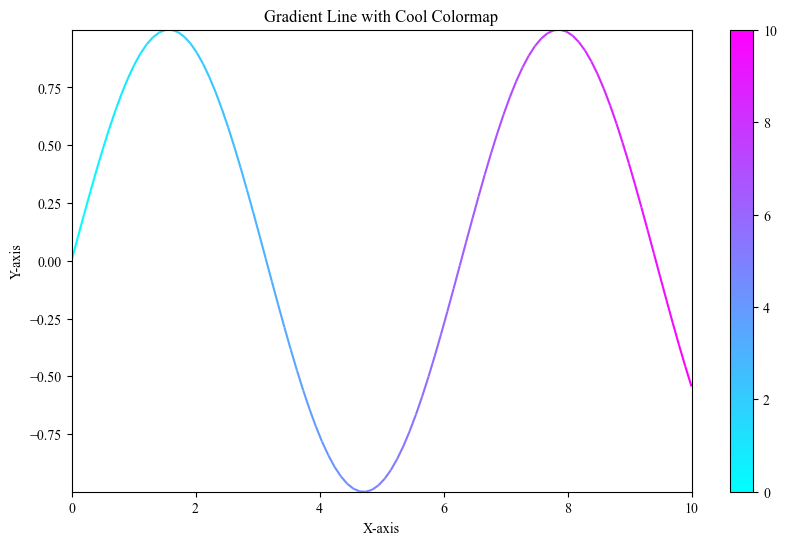

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

# Create sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)
color_data = x  # Using x values for color, but you can use any array

# Create line segments
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Create a LineCollection
lc = LineCollection(segments, cmap='cool', array=color_data)
line = ax.add_collection(lc)

# Set plot limits
ax.set_xlim(x.min(), x.max())
ax.set_ylim(y.min(), y.max())

# Add colorbar
plt.colorbar(line)

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_title('Gradient Line with Cool Colormap')

plt.show()